<a href="https://colab.research.google.com/github/bhouldridge/repertoire/blob/main/UpSalePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1

##Problem Definition

1) Write a concise problem definition for the project.

2) Put it in a text field at the top of your Jupyter notebook.

This is a binary classification problem, which predicts the likelihood a person will accept an upsell. The ideal outcome is to allow the seller to predict when an upsell will be successful.

##Data Collection

3) Load Pandas and Numpy.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4) Load data Train.csv from Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Exercises - Benjamin/Copy of Train.csv')

##Data Cleaning

5) Examine the data using tools we have used in class.

In [ ]:
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
train.shape

(180000, 203)

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 203 entries, Unnamed: 0 to var_199
dtypes: float64(200), int64(2), object(1)
memory usage: 278.8+ MB


6) If there are data cleaning issues, develop recommendations for how to deal
with them.

It looks like most entries are float64, with 2 as int64, and 1 object. The Object is in the reduntent ID_code column, and will be removed.

In [ ]:
train_clean = train.drop(['ID_code', 'Unnamed: 0'], axis = 1).copy()

Varify that ID_code and Unnamed columns are empty.

In [ ]:
train_clean.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


##Exploratory Data Analysis

7) Produce some visual analysis of the data – like the plot showing the
distributions of all variables – you might have to do multiple plots in groups.

8) NOTE: ‘target’ column indicates a successful transaction (‘1’) or a no- transaction (‘0’). Verify these are the only values in that column.

9) Create two dataframes: one with all successful transactions, one with all no-
transactions. Make sure they are copies and not slices.

In [ ]:
train_clean.target.unique()

array([0, 1])

Only 1s and 0s are present in the target column. 

In [ ]:
train0 = train_clean[ train_clean['target']==0 ].copy()
train_0 = train0.drop(['target'], axis = 1).copy()
print(train_0.head())
train_0.shape

     var_0   var_1    var_2   var_3  ...  var_196  var_197  var_198  var_199
0   8.9255 -6.7863  11.9081  5.0930  ...   7.8784   8.5635  12.7803  -1.0914
1  11.5006 -4.1473  13.8588  5.3890  ...   8.1267   8.7889  18.3560   1.9518
2   8.6093 -2.7457  12.0805  7.8928  ...  -6.5213   8.2675  14.7222   0.3965
3  11.0604 -2.1518   8.9522  7.1957  ...  -2.9275  10.2922  17.9697  -8.9996
4   9.8369 -1.4834  12.8746  6.6375  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 200 columns]


(161960, 200)

In [ ]:
train1 = train_clean[ train_clean['target']==1 ].copy()
train_1 = train1.drop(['target'], axis = 1).copy()
print(train_1.head())
train_1.shape

      var_0   var_1    var_2   var_3  ...  var_196  var_197  var_198  var_199
13  16.3699  1.5934  16.7395  7.3330  ...   9.6846   9.0419  15.6064 -10.8529
29   5.3301 -2.6064  13.1913  3.1193  ...   3.7600   9.4513  17.4105 -14.6897
63   7.7072  0.0183   9.9974  8.3524  ...  -3.0468   7.5790  15.7685   5.4769
65  10.5358 -2.5439   8.7394  6.7548  ...   5.3847   8.6949  15.1340   3.8449
71   6.7547  2.5973  14.2141  8.3514  ...   6.8869   9.3567  18.9013  13.3447

[5 rows x 200 columns]


(18040, 200)

Two data sets have been created one with successful transactions, train_1, and one with no transactions, train_0.

In [ ]:
def histograms(df_zeros, df_ones, variables, n_rows, n_columns):

  fig = plt.figure(figsize=(3.5 * n_columns, 3.5 * n_rows))

  for i, var_name in enumerate(variables):
    ax =  fig.add_subplot(n_rows, n_columns, i+1)
    data_zeros = df_zeros[var_name]
    data_ones = df_ones[var_name]
    bin_lims = 25
    # Computing the histograms
    hist1, bins1 = np.histogram(data_zeros, bins=bin_lims)
    hist2, bins2 = np.histogram(data_ones, bins=bin_lims)
    # Normalizing
    hist1b = hist1/np.max(hist1)
    hist2b = hist2/np.max(hist2)
    # Plot the histograms
    ax.plot(bins1[1:], hist1b, label = '0')
    ax.plot(bins2[1:], hist2b, label = '1')
    # Add the plot title
    ax.set_title(var_name+' Distribution ')
    ax.legend()

  fig.tight_layout()  #Improves appearance a bit.

  plt.show()


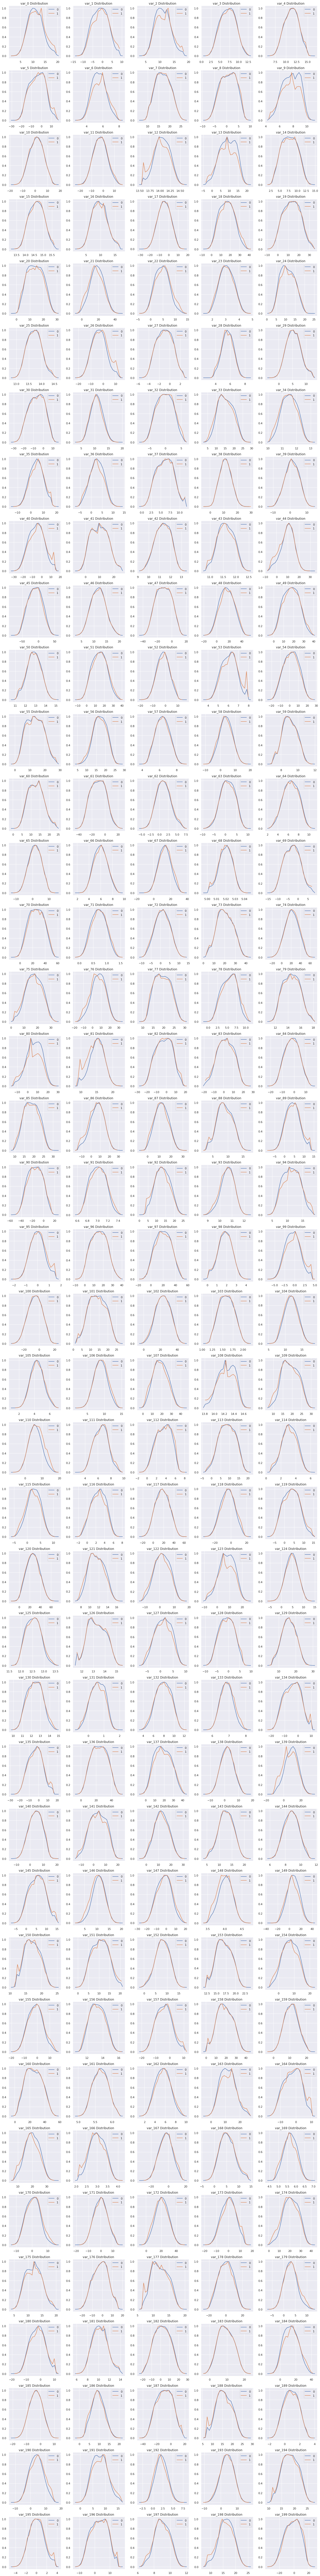

In [ ]:
histograms(train_0, train_1, train_0.columns, 40, 5)

10) Create two more dataframes: one with all the variable columns (remove
‘ID_code’, ‘Unnamed: 0’, and ‘target’ columns), the other one we want just the
‘target’ column. Make sure they are copies and not slices.

In [ ]:
train_variables = train_clean.drop(['target'], axis=1).copy()
print(train_variables.head())
train_variables.shape

     var_0   var_1    var_2   var_3  ...  var_196  var_197  var_198  var_199
0   8.9255 -6.7863  11.9081  5.0930  ...   7.8784   8.5635  12.7803  -1.0914
1  11.5006 -4.1473  13.8588  5.3890  ...   8.1267   8.7889  18.3560   1.9518
2   8.6093 -2.7457  12.0805  7.8928  ...  -6.5213   8.2675  14.7222   0.3965
3  11.0604 -2.1518   8.9522  7.1957  ...  -2.9275  10.2922  17.9697  -8.9996
4   9.8369 -1.4834  12.8746  6.6375  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 200 columns]


(180000, 200)

In [ ]:
train_target = train_clean['target'].copy()
print(train_target.head())
train_target.shape

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


(180000,)

11)Check the correlation values between all the variable columns to ensure
there are no substantial correlations between variables. This is important to
support the decision to classify the ‘target’ using Naïve Bayes.

In [ ]:
corilation_values = train_variables.corr()
print(corilation_values)

            var_0     var_1     var_2  ...   var_197   var_198   var_199
var_0    1.000000 -0.002155  0.006632  ... -0.000691 -0.005945  0.003500
var_1   -0.002155  1.000000  0.005644  ... -0.004360 -0.005352  0.001055
var_2    0.006632  0.005644  1.000000  ...  0.001437 -0.000372  0.003044
var_3    0.004593  0.000202  0.001091  ...  0.000005 -0.003523  0.000212
var_4    0.000830  0.000510 -0.000384  ... -0.000999 -0.002606 -0.000223
...           ...       ...       ...  ...       ...       ...       ...
var_195  0.000806  0.000492  0.000012  ... -0.003095 -0.000463  0.003374
var_196  0.004349  0.000728  0.004941  ... -0.000454 -0.000113  0.001521
var_197 -0.000691 -0.004360  0.001437  ...  1.000000  0.001935  0.005159
var_198 -0.005945 -0.005352 -0.000372  ...  0.001935  1.000000 -0.004840
var_199  0.003500  0.001055  0.003044  ...  0.005159 -0.004840  1.000000

[200 rows x 200 columns]


In [ ]:
corilation_vector = corilation_values.unstack()
corilation_vector = corilation_vector[corilation_vector<1]
corilation_vector_sorted = corilation_vector.sort_values(ascending=False)
print(corilation_vector_sorted[:5])
print(corilation_vector_sorted[-5:])

var_165  var_81     0.009728
var_81   var_165    0.009728
var_149  var_121    0.009660
var_121  var_149    0.009660
var_146  var_169    0.009601
dtype: float64
var_1    var_80    -0.009469
var_148  var_53    -0.009786
var_53   var_148   -0.009786
var_26   var_139   -0.009935
var_139  var_26    -0.009935
dtype: float64


The range of coralation between variables is betwen 0.01 and -0.01, satisfying the assumptions for the use of Bayes' Theorem.

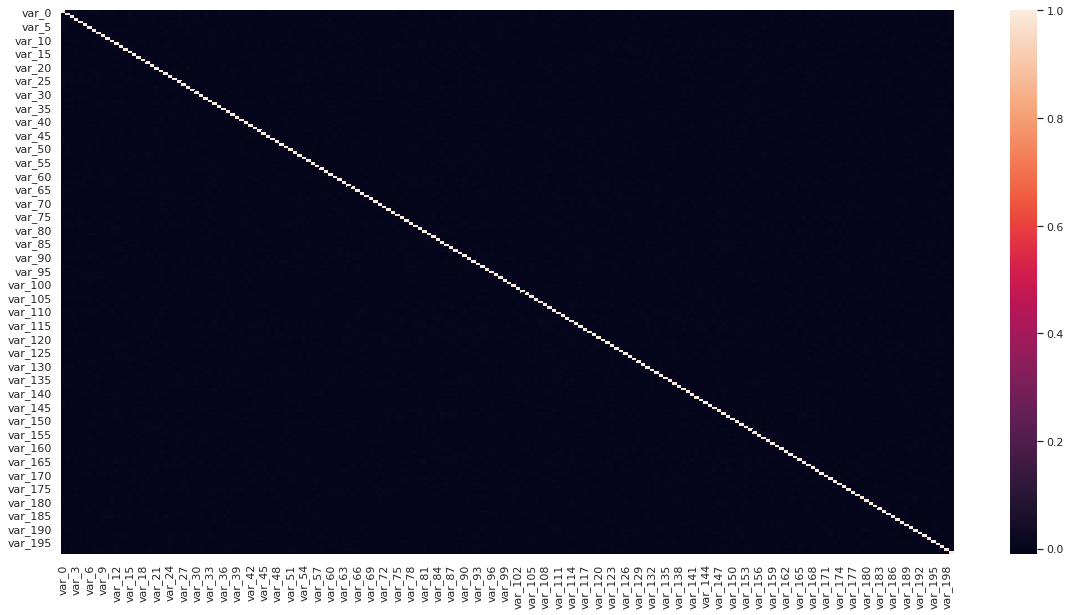

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(corilation_values, annot=False)

The above graph shows us that none of the features are strongly correlated with each other, and therefore the data can be analyzed with Bayes' Theorem. 

##Data Processing

12) Define a Naïve Bayes model using Sklearn

In [ ]:
model_aggregate = GaussianNB()
model_split = GaussianNB()

13) Divide your data into training and testing subsets.

In [ ]:
train_variables_subset_agg, test_variables_subset_agg, train_target_subset_agg, test_target_subset_agg = model_selection.train_test_split(train_variables, train_target, test_size=.15)
print(train_variables_subset_agg.shape)
print(train_target_subset_agg.shape)
print(test_variables_subset_agg.shape)
print(test_target_subset_agg.shape)
test_data_agg = [test_variables_subset_agg, test_target_subset_agg]

(153000, 200)
(153000,)
(27000, 200)
(27000,)


Data is divided, and the sizes of our data sets are as expected.

14) Train the model using the training subset of the dataset.

In [ ]:
v.fit(train_variables_subset_agg, train_target_subset_agg)

GaussianNB(priors=None, var_smoothing=1e-09)

15) The training data is very skewed towards non-successful transactions (about
90% of the training data has ‘target’==0). Remove enough non-successful
transaction rows so that your remaining training data is 50%/50% split
between successful and non-successful transactions.

In [ ]:
train_split = train1.append(train0.sample(frac=18040/161960))
print(train_split.shape)
train_split_variables = train_split.drop(['target'], axis=1).copy()
train_split_target = train_split['target'].copy()
print(train_split_variables.shape)
print(train_split_target.shape)

(36080, 201)
(36080, 200)
(36080,)


In [ ]:
train_variables_subset_split, test_variables_subset_split, train_target_subset_split, test_target_subset_split = model_selection.train_test_split(train_split_variables, train_split_target, test_size=.15)
print(train_variables_subset_split.shape)
print(train_target_subset_split.shape)
print(test_variables_subset_split.shape)
print(test_target_subset_split.shape)
test_data_split = [test_variables_subset_split, test_target_subset_split]

(30668, 200)
(30668,)
(5412, 200)
(5412,)


In [ ]:
model_split.fit(train_variables_subset_split, train_target_subset_split)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
def test(model, test_data): 
  """Return the accuracy of a nieve Bayes' model tested on the set of test data."""

  prediction = model.predict(test_data[0])
  result = metrics.accuracy_score(test_data[1], prediction)
  return result

In [ ]:
def average_accuracy(model, test_data):
  results = np.zeros(100)

  for idx in range(100):
    results[idx] = test(model, test_data)
  
  return results.mean()

In [ ]:
average_accuracy(model_aggregate, test_data_agg)

0.9216666666666667

Tesing the aggregate model.

In [ ]:
agg_agg = average_accuracy(model_aggregate, test_data_agg)
print('Test on aggregate data yeilds accuracy of ' + str(agg_agg),)

agg_split = average_accuracy(model_aggregate, test_data_split)
print('Test on split data yeilds accuracy of ' + str(agg_split),)

agg_0 = average_accuracy(model_aggregate, [train_0, train0['target']])
print('Test on, all targets = 0, yeilds accuracy of ' + str(agg_0))

agg_1 = average_accuracy(model_aggregate, [train_1, train1['target']])
print('Test on, all targets = 1, yeilds accuracy of ' + str(agg_1))

Test on aggregate data yeilds accuracy of 0.9216666666666667
Test on split data yeilds accuracy of 0.6779379157427935
Test on, all targets = 0, yeilds accuracy of 0.9835885403803407
Test on, all targets = 1, yeilds accuracy of 0.36313747228381366


16) Repeat the cross-validation process on this data set.

Testing the split model.

In [ ]:
split_agg = average_accuracy(model_split, test_data_agg)
print('Test on aggregate data yeilds accuracy of ' + str(split_agg))

split_split = average_accuracy(model_split, test_data_split)
print('Test on split data yeilds accuracy of ' + str(split_split))

split_0 = average_accuracy(model_split, [train_0, train0['target']])
print('Test on, all targets = 0, yeilds accuracy of ' + str(split_0))

split_1 = average_accuracy(model_split, [train_1, train1['target']])
print('Test on, all targets = 1, yeilds accuracy of ' + str(split_1))


Test on aggregate data yeilds accuracy of 0.8108518518518519
Test on split data yeilds accuracy of 0.8065410199556543
Test on, all targets = 0, yeilds accuracy of 0.8112126450975551
Test on, all targets = 1, yeilds accuracy of 0.8006651884700663


In [ ]:
d = {'aggregate':[agg_0, agg_agg, agg_split, agg_1], '50/50 split':[split_0, split_agg, split_split, split_1]}
accuracy_df = pd.DataFrame(data=d)
accuracy_df.values

array([[0.98358854, 0.81121265],
       [0.92166667, 0.81085185],
       [0.67793792, 0.80654102],
       [0.36313747, 0.80066519]])

17) Report what your cross-validation accuracy is in this 50/50 case.

In [ ]:
print('Cross-validation accuracy in the 50/50 split model averaged over all 4 tests is ' + str(accuracy_df['50/50 split'].mean()))

Cross-validation accuracy in the 50/50 split model averaged over all 4 tests is 0.8073176763437818


##Data Visualization

19) Observe the results of trying to predict the test subset of your data using data
visualizations.

20) Compare the results of your cross-validation with the whole training data and
the reduced 50/50 training data

Graph how the accuracy of the two models changes as the proportion of 1s and 0s changes in the test data.

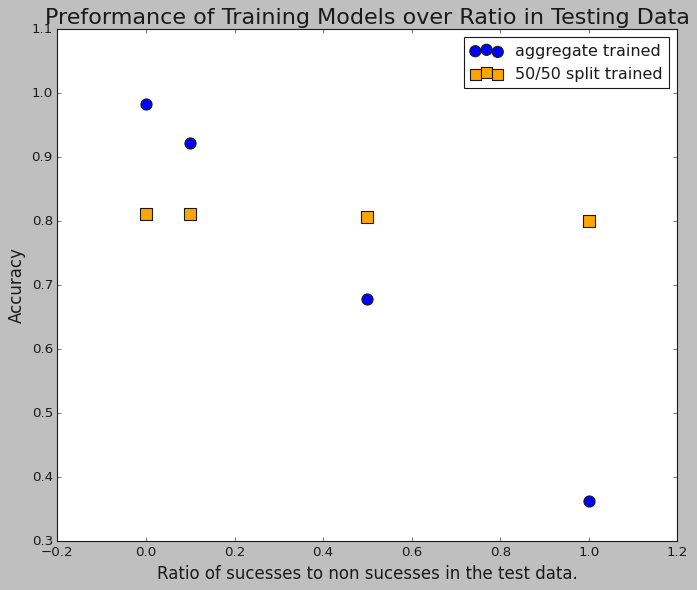

In [ ]:
x = [0, 18040/180000, .5, 1]
y1 = accuracy_df['aggregate']
y2 = accuracy_df['50/50 split']

plt.style.use('classic')
plt.figure(figsize = (10,8))
plt.scatter(x, y1, label='aggregate trained', c='blue', s = 100)
plt.scatter(x, y2, label='50/50 split trained', c='orange', s = 100, marker='s')
plt.xlabel('Ratio of sucesses to non sucesses in the test data.', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('Preformance of Training Models over Ratio in Testing Data', size=20)
plt.legend()


21) Present the confusion matrix and the results of your Classification Report
(sklearn.metrics.classification_report)

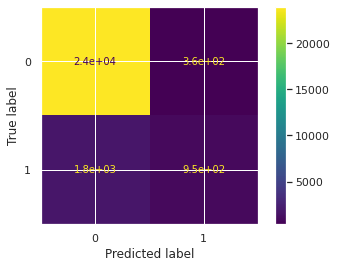

In [ ]:

metrics.plot_confusion_matrix(model_aggregate, test_variables_subset_agg, test_target_subset_agg)

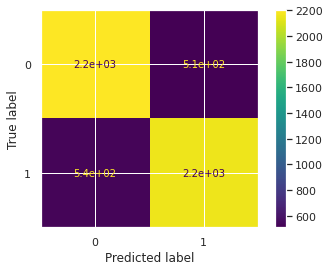

In [ ]:
metrics.plot_confusion_matrix(model_split, test_variables_subset_split, test_target_subset_split)

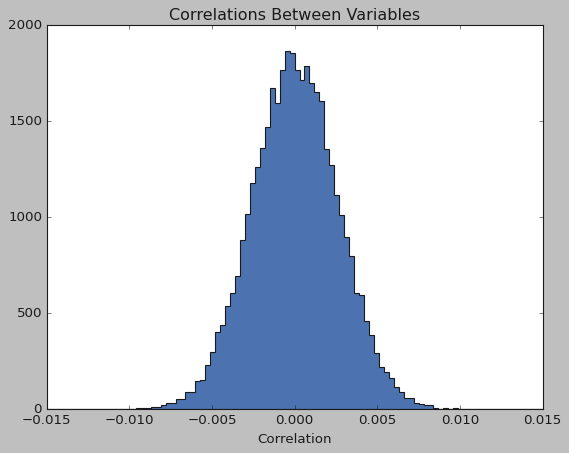

In [ ]:
plt.title('Correlations Between Variables')
plt.xlabel('Correlation')
plt.hist(corilation_vector, bins=100, histtype='stepfilled', range=(-.015, .015));

##Communicate the Results

22) Communicate the results of your training/testing on your data set using data
visualizations.

##Finish Project

23) Run your predictor on the provided “Test.csv” data set in the “Project
1/Data/” folder.

24) Format your results according to the “sample_submission.csv” file on the
Google drive under the “Project 1/Data/” folder.

find and example of this at the end of project 1 hints.

In [ ]:
test_data_blind = pd.read_csv('/content/drive/My Drive/Data Science Student Material/Project 1/Data/Train_blind.csv')

In [ ]:
test_data_blind.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
test_data_variables = test_data_blind.drop(['ID_code'], axis=1)

In [ ]:
test_data_variables.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
sample_submission = pd.read_csv('/content/drive/My Drive/Data Science Student Material/Project 1/Data/sample_submission.csv')

In [ ]:
sample_submission.head()

,ID_code,target
0,train_0,0
1,train_1,0
2,train_2,0
3,train_3,0
4,train_4,0


In [ ]:
predict_unequalized = model_aggregate.predict(test_data_variables)
predict_equalized = model_split.predict(test_data_variables)

In [ ]:
final_submission_unequalized = sample_submission.copy()
final_submission_equalized = sample_submission.copy()

In [ ]:
final_submission_unequalized['target'] = predict_unequalized
final_submission_equalized['target'] = predict_equalized

In [ ]:
final_submission_unequalized.head(10)

,ID_code,target
0,train_0,0
1,train_1,1
2,train_2,0
3,train_3,0
4,train_4,0
5,train_5,0
6,train_6,0
7,train_7,0
8,train_8,0
9,train_9,0


In [ ]:
final_submission_equalized.head(10)

,ID_code,target
0,train_0,0
1,train_1,1
2,train_2,0
3,train_3,1
4,train_4,0
5,train_5,0
6,train_6,1
7,train_7,0
8,train_8,0
9,train_9,0


In [ ]:
final_submission_unequalized.to_csv('/content/drive/My Drive/Project 1/final_submission_unequalized.csv',index=False)
final_submission_equalized.to_csv('/content/drive/My Drive/Project 1/final_submission_equalized.csv',index=False)

##Submit Final Project

25) Upload your finished Jupyter notebook to your Project 1 Github folder.